# pset03: the adventure of the missing phenotype
*by Xingyu (Luna) Li , Sep 20th, 2021*
  
## Background
**Coriander** is a sand mouse transcription factor. However, in a new paper from Lestrade et al., an RNA-seq analysis of wild-type versus Coriander mutant sand mice shows that loss of Coriander function results in **no significant effects** on the mean expression of any sand mouse gene transcript.  
  
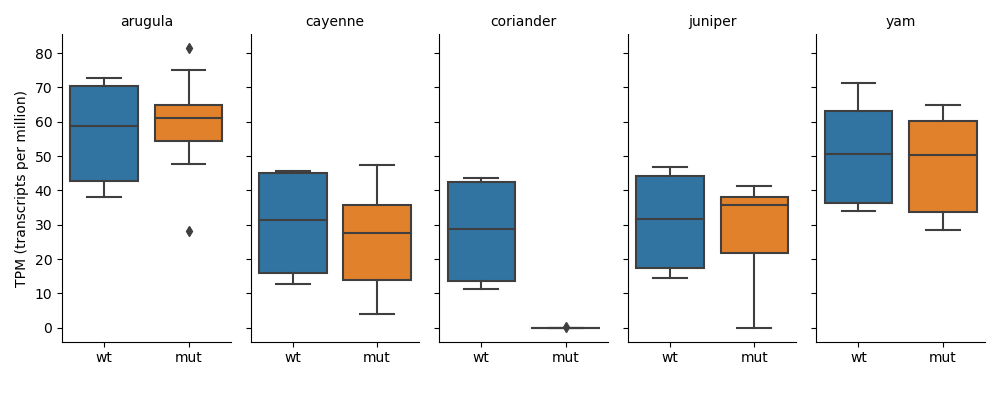   
I am going to look at their original data in the supplementary table to find out what happens.

## 0. Have a Look of the Data

In [1]:
# Look at the start and end of the data
! head -10 w03-data.tbl
! tail -10 w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2021)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      M      F      F      F      F      M      M      M      F      M      M      F      F      M      F      M      F      F      M
anise             50.7   54.0   25.3   20.1   23.2   21.7   54.9   54.0   47.4   26.5   53.1   38.3   50.1   51.5   46.8   35.4   29.3   34.3   30.8   19.9
apricot           17.6   17.7   46.3   46.4   46.9   49.3   16.4   14.2   15.4   47.3   25.4   44.1   21.8   11.3   16.4   15.8   41.2   23.5   41.4   42.4
artichoke         71.4   70.6   42.5   43.6   40.1   42.8   72.5   72.1   71.6   42.7   67.2   38.7   52.5   60.1   71.3   65.0   65.8   63.3   64.9   27.9
arugula           42.2   44.0   70.4   69.8   72.4   72.8   47.8   39.1   38.0   70.2   65.2 

It is a column-justified, whitespace-delimited file with three comment lines and two commented column headers in the start. And there are 21 fields per line: the gene name, 10 replicates for wild type, and 10 replicates for mutant.

In [2]:
# Check the coriander gene expression
! grep coriander w03-data.tbl

coriander         43.6   42.6   16.2   14.0   12.1   11.4   42.6   41.5   41.6   13.6    0.0    0.0    0.0    0.0    0.0    0.1    0.0    0.0    0.0    0.0


We can confirm that the Coriander gene has been knocked out in 10 mutant mice.

## 1. Downsample the Data Set by Reservoir Sampling
Next, we want to take a random sample of the data to check it.  
  
Reservoir sampling allows us to sample elements from a stream, without knowing how many elements to expect. The final solution is extremely simple, yet elegant. It does not require fancy data structures or complex math but just an intuitive way of adapting probabilities.  
  
Here we are going to use the reservoir sampling algorithm to take a random sample of 10 data (non-comment) lines.  

In [3]:
# Read the expression data 
import pandas as pd
names = ['wt'+str(i) for i in range(1,11)] + ['mut'+str(i) for i in range(1,11)] # set the names for each sample
data = pd.read_table('w03-data.tbl', delim_whitespace = True , comment='#', header = None, index_col=0, 
                    names = names)
    # read the whitespace-delimited table, ignore the comment line starts with '#',set no header, 
    #  use the first field as row name and finally set the names for each column
print(data.shape)
data.head(5)

(20031, 20)


,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,wt10,mut1,mut2,mut3,mut4,mut5,mut6,mut7,mut8,mut9,mut10
anise,50.7,54.0,25.3,20.1,23.2,21.7,54.9,54.0,47.4,26.5,53.1,38.3,50.1,51.5,46.8,35.4,29.3,34.3,30.8,19.9
apricot,17.6,17.7,46.3,46.4,46.9,49.3,16.4,14.2,15.4,47.3,25.4,44.1,21.8,11.3,16.4,15.8,41.2,23.5,41.4,42.4
artichoke,71.4,70.6,42.5,43.6,40.1,42.8,72.5,72.1,71.6,42.7,67.2,38.7,52.5,60.1,71.3,65.0,65.8,63.3,64.9,27.9
arugula,42.2,44.0,70.4,69.8,72.4,72.8,47.8,39.1,38.0,70.2,65.2,62.8,59.3,53.0,63.8,47.6,75.1,81.4,58.7,28.3
asparagus,35.8,35.7,63.1,62.3,62.7,63.8,34.1,33.5,33.2,68.2,31.9,47.7,75.9,50.8,46.3,44.0,43.2,31.4,30.1,43.7


In [4]:
# Define the reservoir sampling algorithm
def reservoir_sampling(data, sample_n):
    import numpy as np
    reservoir = data[:sample_n]     # allocate a reservoir to hold up to sample_n elements
    i = sample_n                    # for each subsequent element i, starting with i = sample_n + 1
    while i < len(data):            # up to the last one i = n
        r = np.random.randint(0, i) # choose a random number r = [0 … i]
        if r < sample_n:            # if r < sample_n
            reservoir[r] = data[i]  # swap element i into reservoir slot r, discarding the element that was there
        i += 1                      # iterate through each i
    return reservoir

# Take a random sample of 10 genes
gene = list(data.index)   # get the gene names
import numpy as np
np.random.seed(99)        # set a seed for reproducibility 
sample = reservoir_sampling(gene, sample_n = 10) # sample 10 genes
data.loc[sample]          # return the gene expression

,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,wt10,mut1,mut2,mut3,mut4,mut5,mut6,mut7,mut8,mut9,mut10
HSP90AA1,19.2,20.1,45.0,43.6,48.8,49.8,19.8,20.3,15.9,48.4,57.2,60.7,36.5,37.3,49.1,28.3,27.8,39.5,23.1,15.3
GPR141,43.3,49.4,21.0,21.9,22.6,22.0,51.3,45.3,47.6,17.1,20.8,38.1,32.3,54.4,27.5,35.0,24.6,27.8,43.5,25.5
DNAJB14,24.2,22.6,53.0,50.8,48.6,51.6,22.9,23.2,20.8,49.4,32.9,19.9,51.6,44.8,44.2,11.4,38.0,29.0,33.9,45.0
PRDM14,29.0,33.7,59.9,59.0,58.2,62.1,35.2,32.1,30.9,60.6,41.7,42.3,56.4,46.0,46.8,43.3,28.8,35.9,29.6,55.1
RP11-437B10.1,66.3,68.4,41.6,42.8,43.8,38.7,72.4,72.4,68.9,44.1,45.3,48.9,63.9,43.7,38.9,53.7,56.3,48.1,57.8,64.0
GNL1,71.1,71.3,43.8,41.6,42.7,43.2,70.6,72.9,72.7,43.3,60.5,50.4,70.6,59.5,29.6,55.2,26.7,57.7,28.8,43.5
AC104057.1,60.3,50.5,83.7,76.4,79.4,83.1,52.4,50.1,49.1,84.0,56.0,80.6,50.1,56.6,65.8,78.1,77.7,45.3,73.7,71.4
OR4D2,88.9,81.2,51.4,53.9,55.5,53.5,82.2,85.6,85.0,52.7,64.8,88.5,74.5,70.0,82.9,79.4,64.7,57.0,74.3,69.3
HAS2,15.1,14.6,46.2,41.5,44.9,43.1,14.9,16.8,16.6,43.0,40.6,10.7,44.1,47.8,20.5,27.1,27.2,11.6,37.9,50.4
AGAP1,56.7,56.9,27.5,27.0,28.3,30.3,58.5,59.0,55.2,26.5,39.8,21.9,20.1,52.3,45.5,31.8,45.6,43.3,17.7,56.1


## 2. Look at Outliers; Validate the Formatting; and Clean the Data

The next step is to check over the whole file:
- Find and print the data line that contains the maximum expression level.
- Find and print the data line that contains the minimum expression level.
- Find lines that don't have the right format. ("Right" is deliberately left vague. Validation is a creative art!)
  
And we are going to remove the data lines that have the problems.

In [5]:
# Find the maximum and minimum expression level
pd.DataFrame({'max': data.max(),'min': data.min()})

,max,min
wt1,n.d.,-999.0
wt2,n.d.,-999.0
wt3,n.d.,-999.0
wt4,n.d.,-999.0
wt5,n.d.,-999.0
wt6,n.d.,-999.0
wt7,n.d.,-999.0
wt8,n.d.,-999.0
wt9,n.d.,-999.0
wt10,n.d.,-999.0


It turns out that there are values called **'n.d.'** which means 'not detected' and negative values **'-999.0'** for all RNA-seq samples, and python mistook them as maximum and minimum values.  
   
Therefore, we need to remove those problematic observations.  

In [6]:
# Remove non-numeric and negative values
for i in data.columns:                                   # iterrate through each column
    data = data[data[i].str.contains('\d',na = False)]   # only keep the numeric values ('/d') and drop NAs
    data = data[~ data[i].str.contains('-')]             # drop negative values which contains '-'
# Check the statistics of our cleaned data
data = data.astype(float)   # change the data type to float
data.describe()
    # I have tried to use this function in the previous step, but since there are non-numeric values, 
    # the describe() function would only return the count, unique, top and freq.

,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,wt10,mut1,mut2,mut3,mut4,mut5,mut6,mut7,mut8,mut9,mut10
count,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000
mean,49.917063,49.916473,49.922755,49.923270,49.921894,49.923145,49.915888,49.917408,49.917283,49.922505,49.918759,49.921874,49.924995,49.920264,49.925090,49.918534,49.921999,49.919274,49.925600,49.916138
std,18.947246,18.939444,19.105568,19.054741,19.088533,19.079011,18.968691,18.920866,19.006294,19.080174,18.842910,18.914945,18.869518,18.875679,18.796003,18.752464,19.041884,19.006396,18.914145,18.957955
min,8.900000,7.800000,5.600000,8.700000,7.300000,8.000000,5.100000,7.400000,7.900000,8.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.900000,35.900000,35.500000,35.600000,35.500000,35.700000,35.900000,36.000000,35.800000,35.600000,36.900000,36.700000,36.700000,36.600000,36.900000,36.700000,36.500000,36.400000,36.700000,36.400000
50%,50.000000,49.900000,49.800000,49.900000,49.900000,49.900000,50.000000,50.100000,50.000000,49.800000,49.800000,49.900000,49.900000,49.900000,49.800000,49.900000,49.900000,50.000000,49.900000,49.800000
75%,64.200000,64.300000,64.300000,64.200000,64.225000,64.300000,64.100000,64.100000,64.200000,64.300000,63.000000,63.200000,63.200000,63.100000,63.100000,63.000000,63.400000,63.300000,63.100000,63.200000
max,92.800000,91.500000,91.700000,91.700000,91.600000,92.000000,94.700000,90.800000,91.800000,90.800000,118.500000,119.500000,125.400000,122.400000,122.400000,115.100000,120.800000,125.200000,120.800000,117.600000


After cleaning the data, there are 19,996 data lines left for 20 sand mouse samples.
  
  
## 3. Tidy the Data

In a tidy data set: 
- each variable forms a column
- each observation forms a row
- each type of observational unit forms a table  
  
According to Wickham: it is easier to describe functional relationships between variables than between rows, and it is easier to make comparisons between groups of observations than between groups of columns.  
  
Therefore,  we are going to take **genes as columns and samples as rows**, and then add the genotype and sex information of each sample.

In [7]:
# Sort the data, transpose it, and reset the index
sorted = data.sort_index()                    # sort the data according to row names
transposed = sorted.T.reset_index(drop=True)  # transpose the data and reset the index

# Read the genotype and sex information from the file
genotype = pd.read_table('w03-data.tbl', delim_whitespace = True , header = None, skiprows = 3, nrows = 1)
sex = pd.read_table('w03-data.tbl', delim_whitespace = True , header = None, skiprows = 4, nrows = 1)

# Drop the '#'s and reset the column and row names
genotype = genotype.drop(columns = [0]).T.reset_index(drop=True).T.rename(index={0:"genotype"}) 
sex = sex.drop(columns = [0,1]).T.reset_index(drop=True).T.rename(index={0:"sex"})         

# concatenate the information and the expression data
info = pd.concat([genotype,sex])
tidy = pd.concat([info.T,transposed],axis=1)
tidy

,genotype,sex,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,tamarind,tangerine,thyme,tomato,turnip,wasabi,watercress,watermelon,yam,zucchini
0,wt,M,61.5,52.6,30.0,61.1,44.1,45.3,80.0,34.1,...,69.7,47.3,67.8,22.5,80.9,64.4,54.5,43.8,64.9,30.0
1,wt,M,62.9,54.2,26.4,57.3,42.4,43.1,80.7,33.2,...,68.6,46.1,64.2,22.6,78.8,63.1,59.9,39.1,62.0,35.5
2,wt,F,32.9,82.5,62.1,29.7,75.0,19.3,56.2,61.6,...,43.7,78.0,32.7,54.4,53.7,35.8,81.8,71.5,35.6,60.8
3,wt,F,35.1,78.9,60.4,29.5,70.1,16.6,53.6,60.9,...,42.9,77.2,33.4,54.6,55.5,37.3,82.6,67.3,34.1,59.2
4,wt,F,36.2,85.5,60.1,29.6,79.5,18.2,50.1,61.3,...,48.7,80.3,39.0,51.1,51.2,33.7,78.7,72.4,39.4,61.6
5,wt,F,38.8,82.2,58.3,32.2,73.2,13.4,57.4,63.1,...,43.2,75.6,32.3,51.7,53.3,39.6,81.2,67.8,34.6,59.5
6,wt,M,65.4,54.6,32.6,52.5,47.0,50.3,78.6,32.6,...,73.1,45.3,67.0,20.8,78.7,61.6,54.8,46.0,63.4,31.7
7,wt,M,65.0,52.5,33.5,57.4,48.1,48.0,83.9,32.6,...,73.2,43.2,60.5,23.6,85.9,64.1,50.0,41.8,71.4,29.9
8,wt,M,63.6,53.9,30.5,56.6,46.0,46.3,82.5,30.5,...,70.0,47.7,65.3,23.6,81.0,64.6,54.8,42.1,62.2,30.7
9,wt,F,41.0,83.4,58.2,34.8,73.4,18.7,52.9,62.8,...,42.2,80.8,34.8,54.2,57.7,36.0,74.7,67.6,38.8,60.5


In [8]:
# Write the tidy data to the file
tidy.to_csv('w03-data-tidy.tsv',sep = '\t') #  create a tab-delimited file

## 4. Visualize the Data and Explain my Conclusions

Finally, I am going to randomly sample 10 genes and visualize the distribution of the their expression level(TPM) and try to figure out what's going on with the Coriander gene.

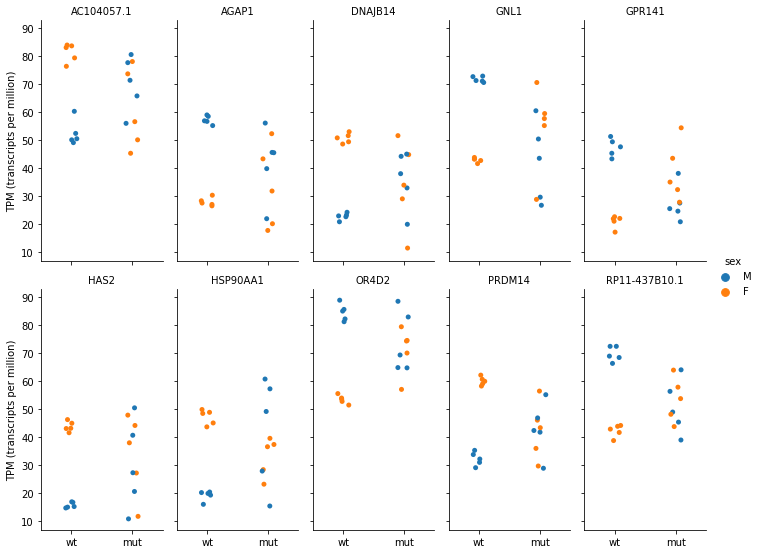

In [9]:
# Melt the data to put gene names in one column
melted = pd.melt(tidy, id_vars = ['genotype', 'sex'], var_name = "gene", value_name = "TPM")

# Get the expression of our previously reservior-sampled 10 genes
plot_data = melted.loc[melted['gene'].isin(sample)] 

# Draw the strip plots of them
import seaborn as sns
plot = sns.catplot(x = "genotype", y = "TPM", col = "gene", hue = "sex", data = plot_data, 
                   kind = "strip", jitter = True, height = 4, aspect = 0.5, col_wrap = 5)
                   # use different colors for different sex (hue = "sex")
plot.set_axis_labels("", "TPM (transcripts per million)") # set y-axis labels
plot.set_titles("{col_name}")      # set the facets titles to be gene names
plot.savefig('fig.jpg')            # save our figure in a .jpg file

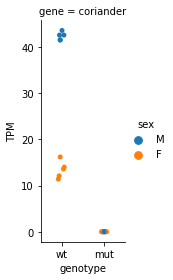

In [10]:
# Also look at the Coriander gene
cor = melted.loc[melted['gene'] == 'coriander'] 
plot_c = sns.catplot(x = "genotype", y = "TPM", col = "gene", hue = "sex", data = cor, 
                   kind = "strip", jitter = True, height = 4, aspect = 0.5)
plot.set_axis_labels("", "TPM (transcripts per million)") # set y-axis labels
plot.set_titles("{col_name}")        # set the facets titles to be gene names
plot.savefig('fig_c.jpg')            # save our figure in a .jpg file

By sampling 10 genes ramdomly, we can see that there are indeed no obvious overall expression differences between the mutant and wildtype mice.  

However, by color-coding different genders, we found that **there are distinct expression patterns for different genders in wild-type sand mouse, and after Coriander knock-out, the differences disappear.** I keep repeating the sampling and the results are consistent. 
    
The expression level of Coriander itself also differs in male and female, indicating that Coriander gene may encode a transcription factor that is **gender-related**. One possible guess is that it acts on certain sex hormone-related gene loci or on the Y chromosome (sex determination chromosome) in sand mice. More experiments are necessary to test the hypothesis.
    
As for Lestrade's paper, he only drew a box plot displaying means and standard errors of gene expression levels, thereby overlooked the actual distribution of raw data points between male and female, leading to his erroneous conclusion.  
